<a href="https://colab.research.google.com/github/yuktash/Failure-Analysis-Predictive-Maintenance/blob/main/Failure_Analysis_Predictive_mantainance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Failure Analysis Predictive Maintenance**

# **Why Predictive Maintenance**

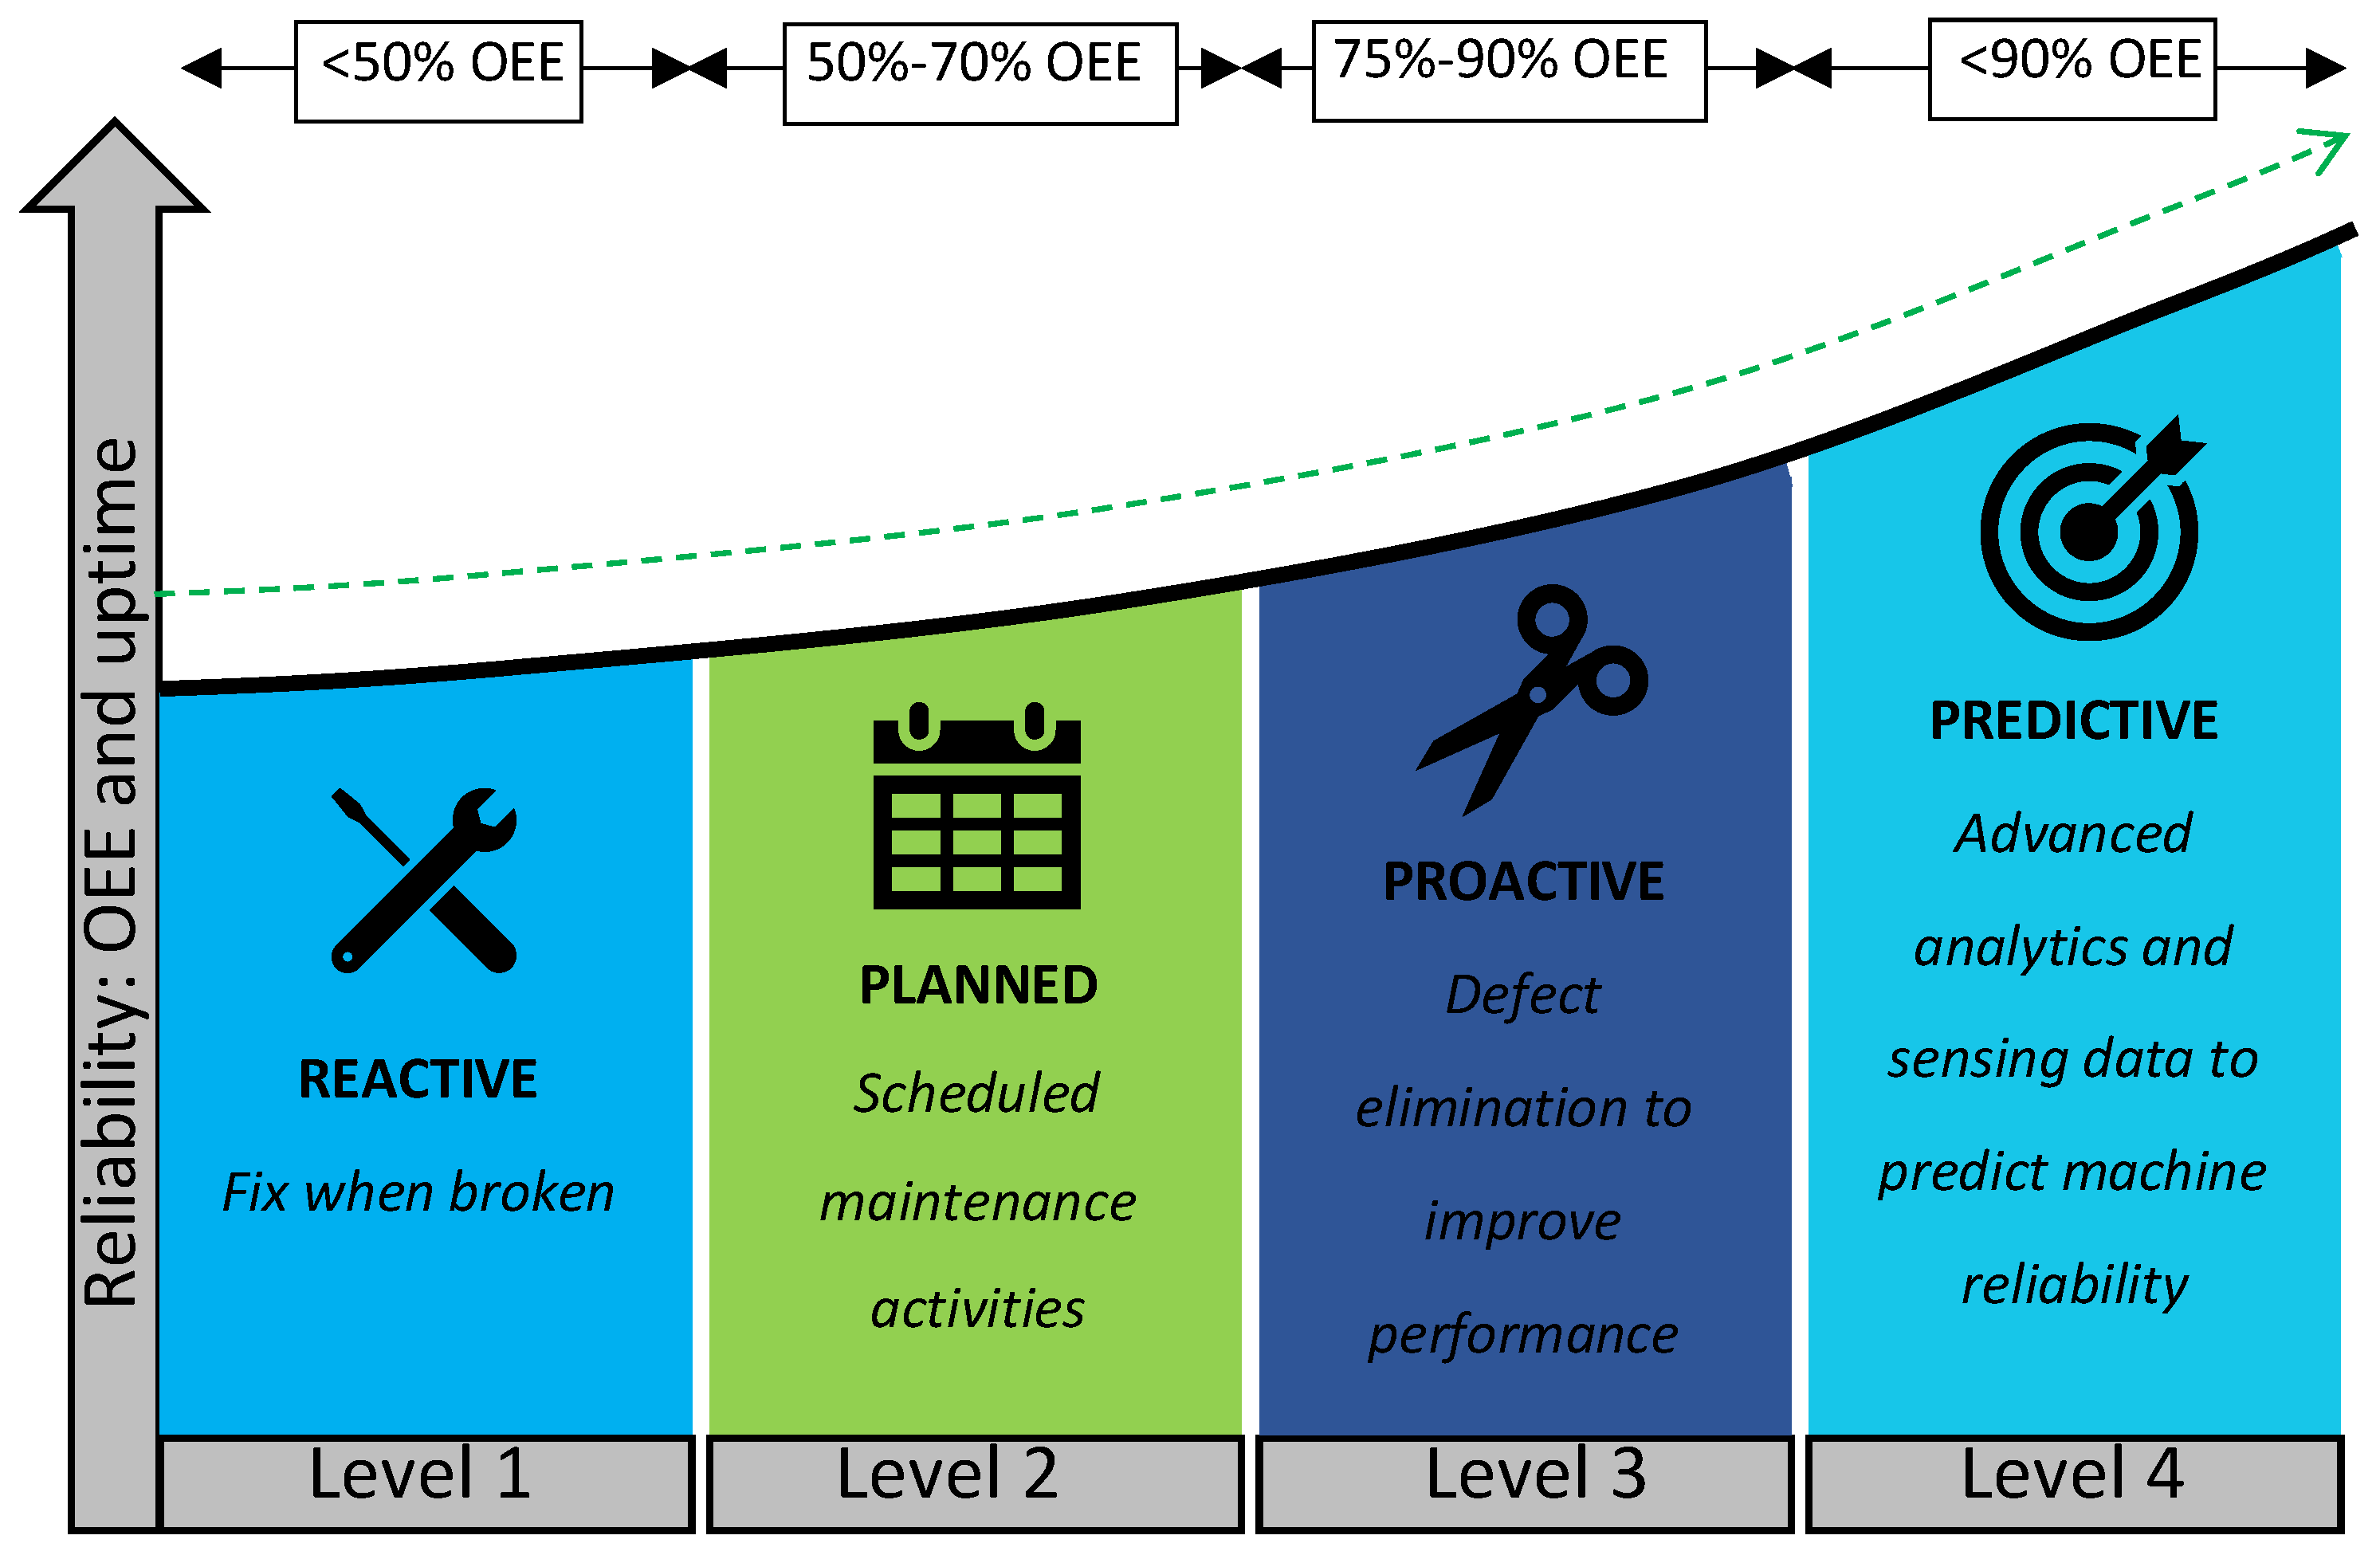

## **process flow chart**

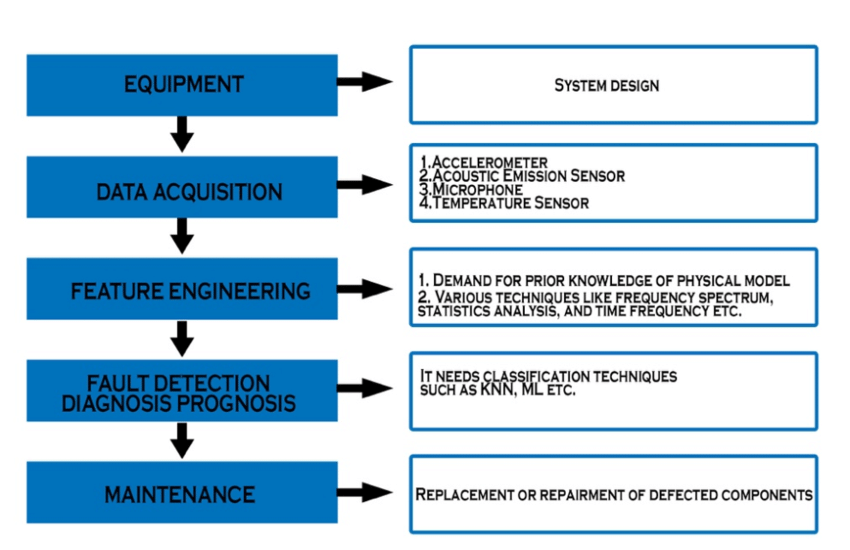

# **Data Collection**

1. **Current condition data** includes information about the state of the equipment, such as its temperature, pressure, vibration, and other physical parameters.
2. **Operating data** includes information about how the equipment is being used, such as its load, speed, and other operating parameters.
3.**Maintenance history** data includes information about past maintenance activities that have been performed on the equipment.
4.**Failure history data** includes information about past equipment failures, such as the date of the failure, the cause of the failure, and the impact on operations.

# **variables for Failure Analysis**

1. **UID**: unique identifier ranging from 1 to 10000
2. **product** **ID**: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
type: just the product type L, M or H from column 2
3. **air** **temperature** [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
4. **process** **temperature** [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
5. **rotational** **speed** [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
5. **torque** [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
6. **tool** **wear** [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

# **Failure types**

* **tool wear failure (TWF)**: the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
* **heat dissipation failure (HDF):** heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
* **power failure (PWF):** the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
* **overstrain failure (OSF)**: if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
* **random failures (RNF):** each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

# **Relationship between Variables responsible for Failure**

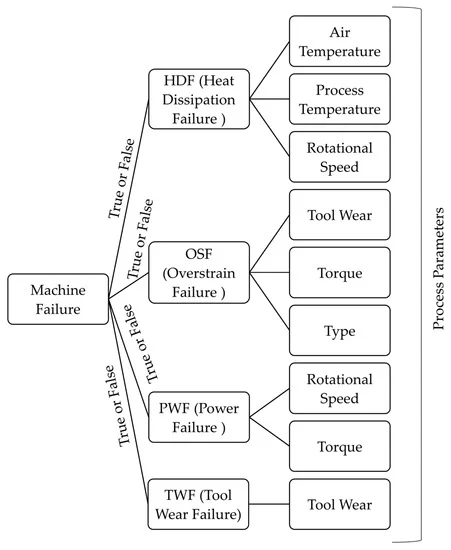

**statistical python libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Data/predictive_maintenance.csv")

# Preprocessing of Data


equipment : Milling Machine
categories


1.   Heavy Duty milling machine
2.   Medium Duty milling Machine
3.  Low duty Milling machine



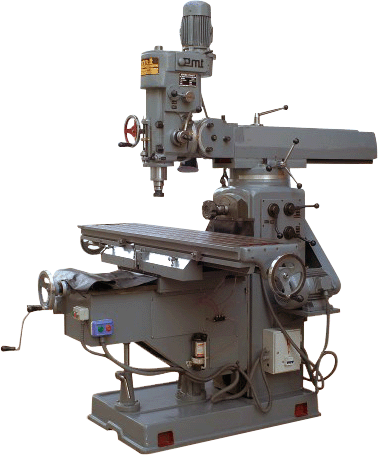

# **let's View Data**

In [ ]:
data.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Data Preprocessing : Drop unwanted

In [ ]:
data = data.drop(["UDI","Product ID"],axis=1)
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


# EDA(Exploratory Data Analysis)
Exploratory Data Analysis (EDA) is an approach to perform initial investigations on data to discover patterns, spot anomalies, test hypothesis and check assumptions with the help of statistics and graphical representations.

In [ ]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
pd.DataFrame(data['Failure Type'].value_counts())

,Failure Type
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [ ]:
data.groupby(['Type','Target']).median()

<ipython-input-10-d511da26d0a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Type','Target']).median()


Air temperature [K]  Process temperature [K]  \
Type Target                                                 
H    0                     299.7                    309.9   
     1                     302.0                    310.2   
L    0                     300.1                    310.1   
     1                     301.2                    310.4   
M    0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Type Target                                                        
H    0                       1502.0         40.2            106.0  
     1                       1371.0         53.8            147.0  
L    0                       1508.0         39.7            107.0  
     1                       1362.0         53.9            182.0  
M    0                       1506.0         40.0            105.0  
     1                       1372.0         51.6            125.0

In [ ]:
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [ ]:
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

# Skewness Analysis
Skewness measures the deviation of a random variable's given distribution from the normal distribution, which is symmetrical on both sides.Skewness Analysis are performed to see whether the numerical features are severely skewed or not and this will help us in creating better linear models. If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In [ ]:
data_numeric = data.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
data_numeric.skew()

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

# Data Visualisation

<Axes: xlabel='Target', ylabel='count'>

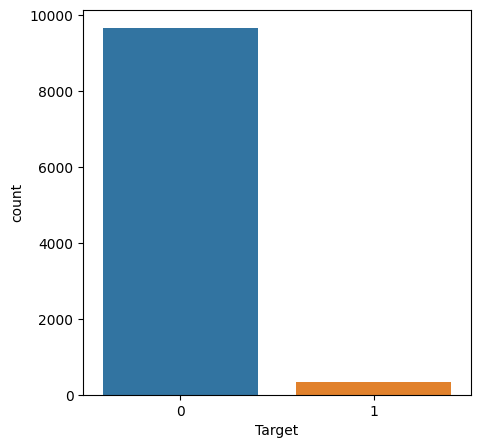

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="Target")

<Axes: xlabel='Failure Type', ylabel='count'>

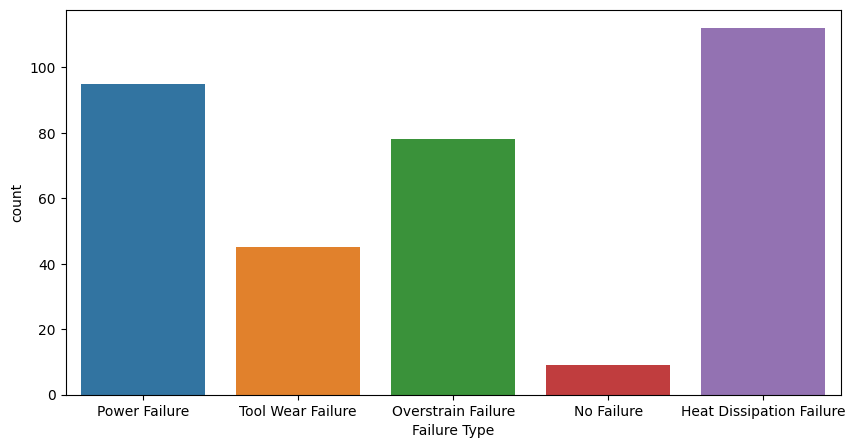

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")

In [ ]:
df=data[data['Target']==1]

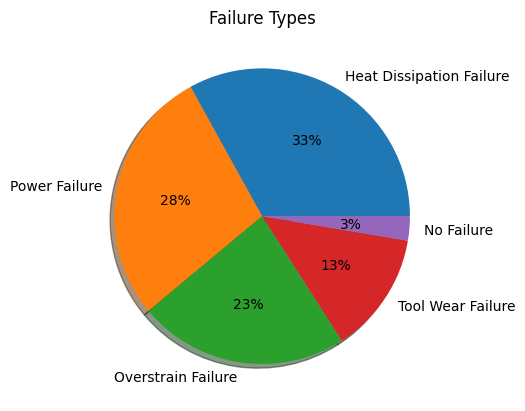

In [ ]:
labels=df['Failure Type'].value_counts().index.tolist()
sizes=df['Failure Type'].value_counts().tolist()
plt.pie(sizes,labels=labels,autopct = '%.0f%%',shadow=True)
plt.title('Failure Types')
plt.show()

# **Heat dissipation failure**

*  Heat dissipation occurs when an object that is hotter than other objects is placed in an environment where the heat of the hotter object is transferred to the colder objects and the surrounding environment

* Temperature difference is the major factor that determines the mode and rate of heat transfer in a given application

* conduction, convection, radiation are three processes of heat transfer in which conduction is applied over here

  * Conduction:  which allows heat to dissipate throughout a material and possibly into a different material that is in contact with the hot material.


***causes of heat dessipation***

1) High speed of opration
2) tool wear/ worn out
3) friction betweem faces and workpiece

 *  Q=k*A*(T1 - T2) / L









# **Tool wear failure**

* In machining, tool wear is the gradual failure of cutting tools due to regular operation, tool wear is the loss of material from the surface.

factors affecting tool wear
1. cutting spped/ opration speed
2. Feed & Depth of cut
3. overheating



 **causes:**
**Effects of tool wear**
Some general effects of tool wear include:

1. increased cutting forces
2. increased cutting temperatures
3. poor surface finish
4. decreased accuracy of finished part
5. May lead to tool breakage

Causes change in tool geometry
Reduction in tool wear can be accomplished by using lubricants and coolants while machining. These reduce friction and temperature, thus reducing the tool wear.


A more general form of the equation is

image.png


* V=cutting speed
* T=tool life
* D=depth of cut
* S=feed rate
* x and y are determined experimentally
* n and C are constants found by experimentation or published data; they are  properties of tool material, workpiece and feed rate.


# **Overstrain Failure**



Failure due to excessive load than req capacity strain, stress occours in materil & tool machine which is calculated as porduct of torque &

# **Misslanious Failure**

there are various factors responsible in industry for machine failure A
Some types of mechanical failure mechanisms are: excessive deflection, buckling, ductile fracture, brittle fracture, impact, creep, relaxation, thermal shock, wear, corrosion, stress corrosion cracking, and various types of fatigue. Such failures are named as other failure

In [ ]:
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# factor responsible for each failure in system e.g. which variable shows intresting instight on distribution with Heat dissipation failure.

#check diff numrical variable distribution for different failure mode
#sns.lineplot(x=data['Failure Type'],y=data['Air temperature [K]	'],data=data)

In [ ]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

<Axes: xlabel='Air temperature [K]', ylabel='Density'>

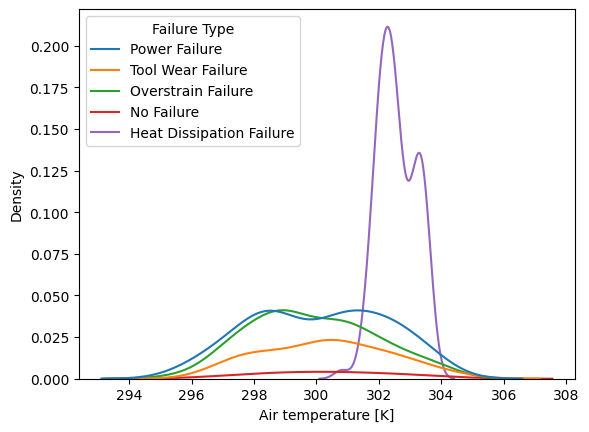

In [ ]:
sns.kdeplot(df,x='Air temperature [K]',hue='Failure Type')

when air temprature is in 300-304 Heat dissipation failure occouring

In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

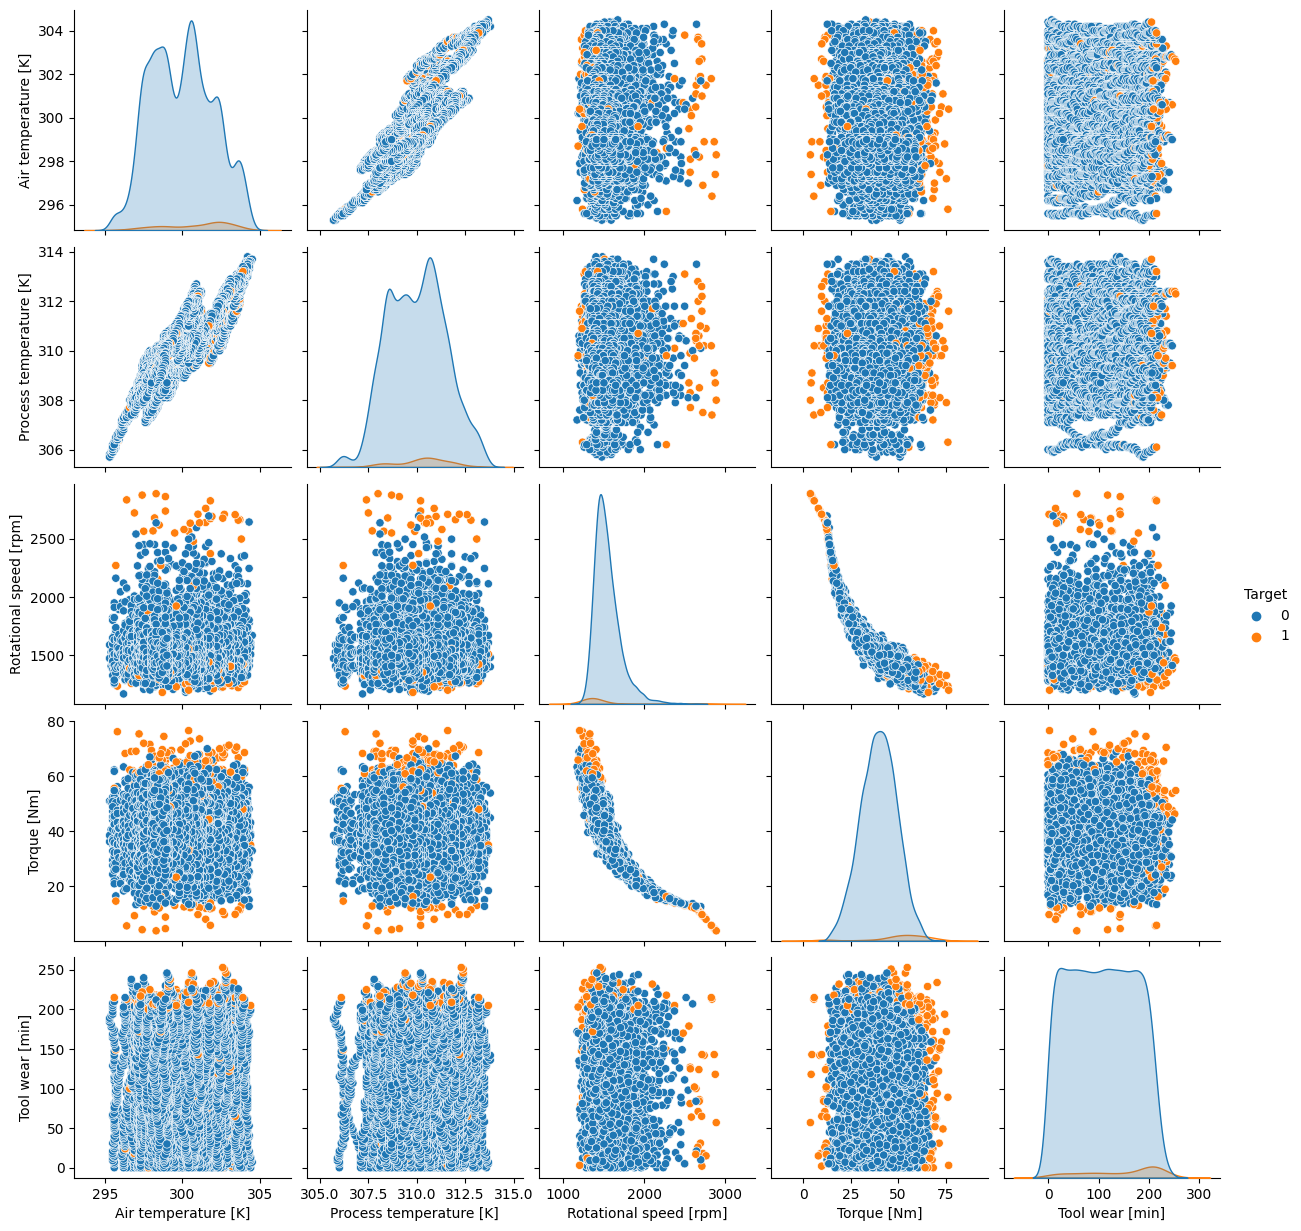

In [ ]:
sns.pairplot(data,hue='Target')

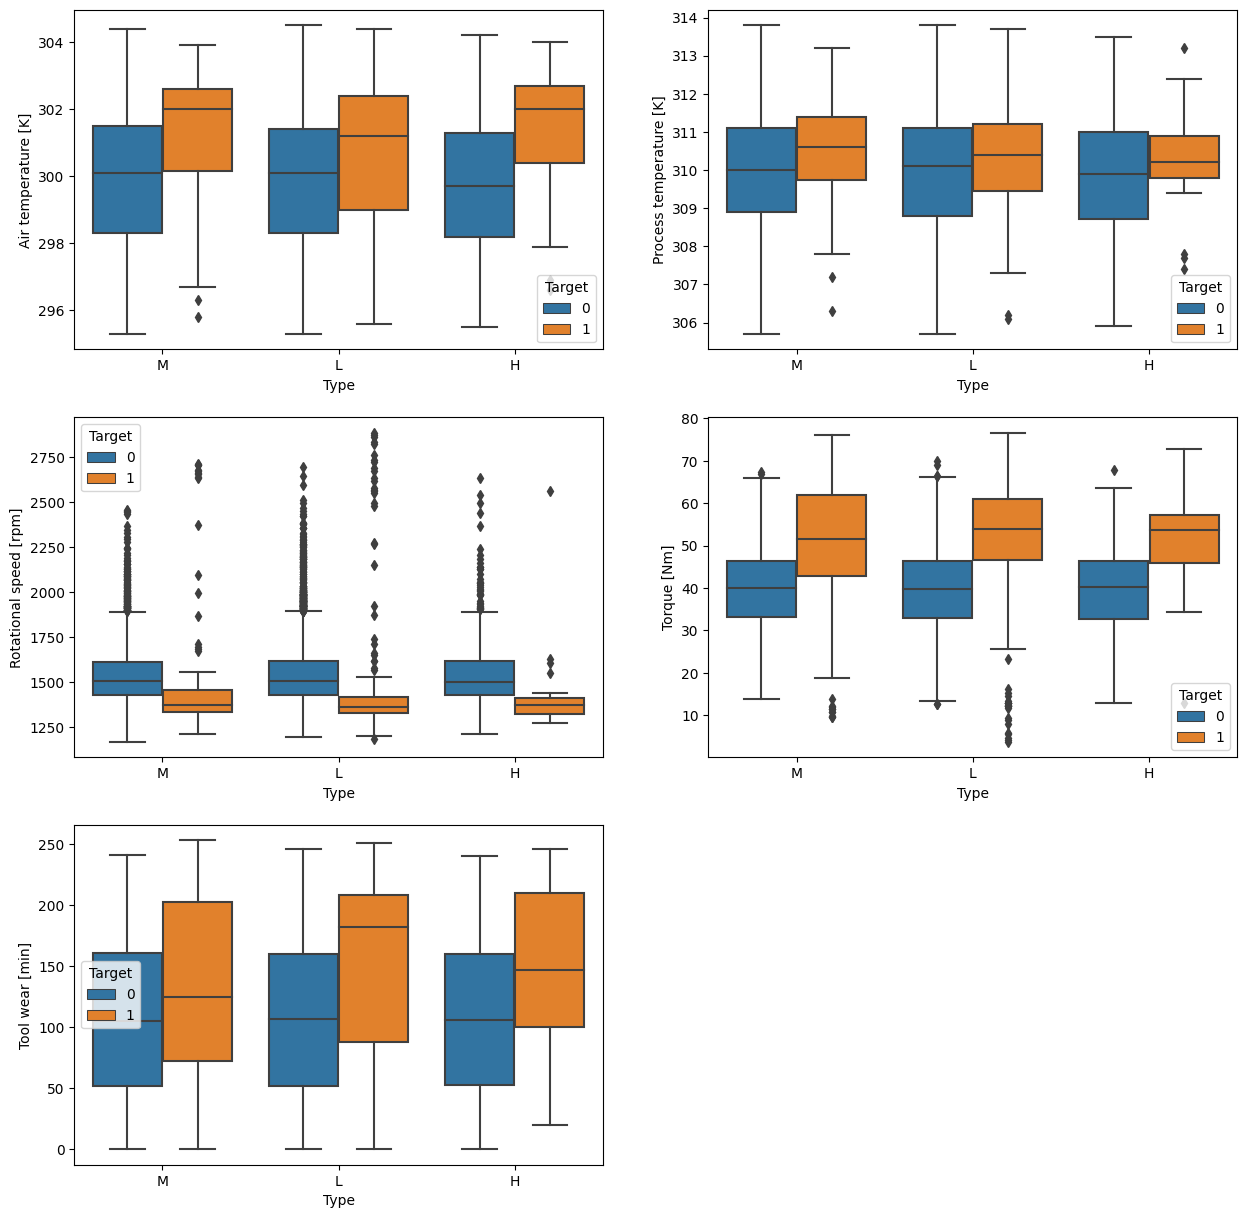

In [ ]:
plt.figure(figsize = (15,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=data,y=i,x="Type",hue="Target")
    m+=1

# ***various Numrical Variables against Failures***

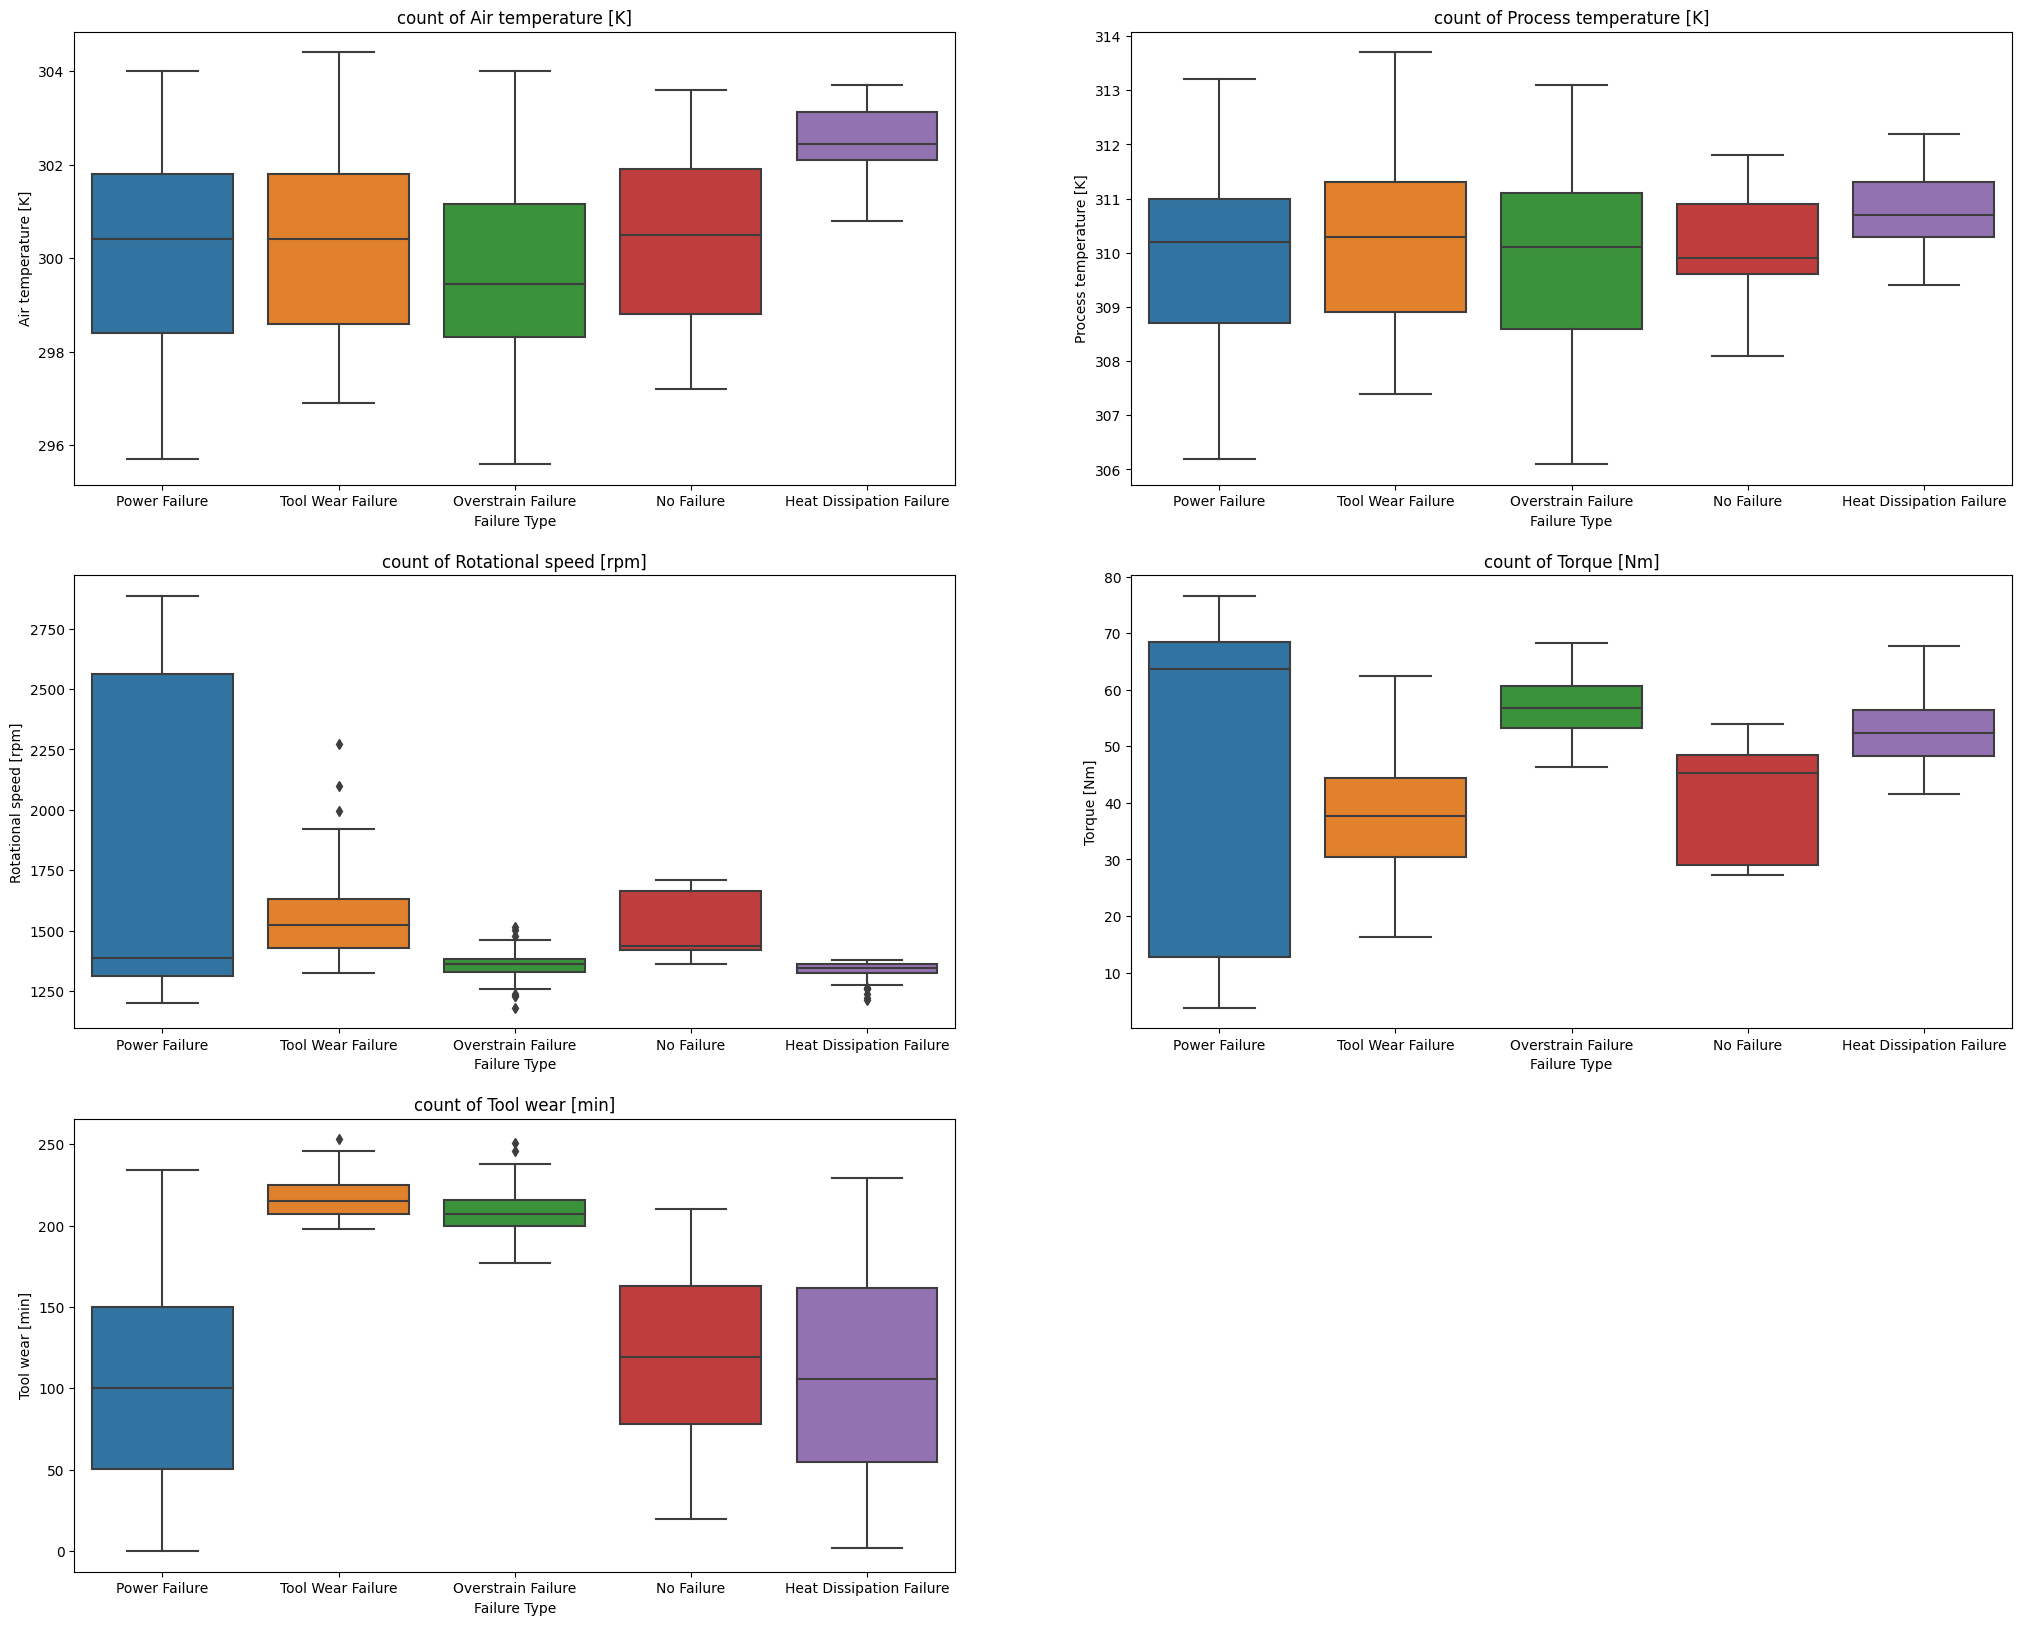

In [ ]:
cols = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

n=1
plt.figure(figsize=(25,20))
for i in cols:
  plt.subplot(3,2,n)
  n=n+1
  sns.boxplot(data=df,y=i,x='Failure Type')
  plt.title(f"count of {i}")
plt.show()

In [ ]:
def feat_prob(feature,data):
    x,y = [],[]
    for j in data[feature].unique():
        temp = data
        temp = temp[temp[feature]>=j]
        y.append(round((temp.Target.mean()*100),2))
        x.append(j)
    return(x,y)

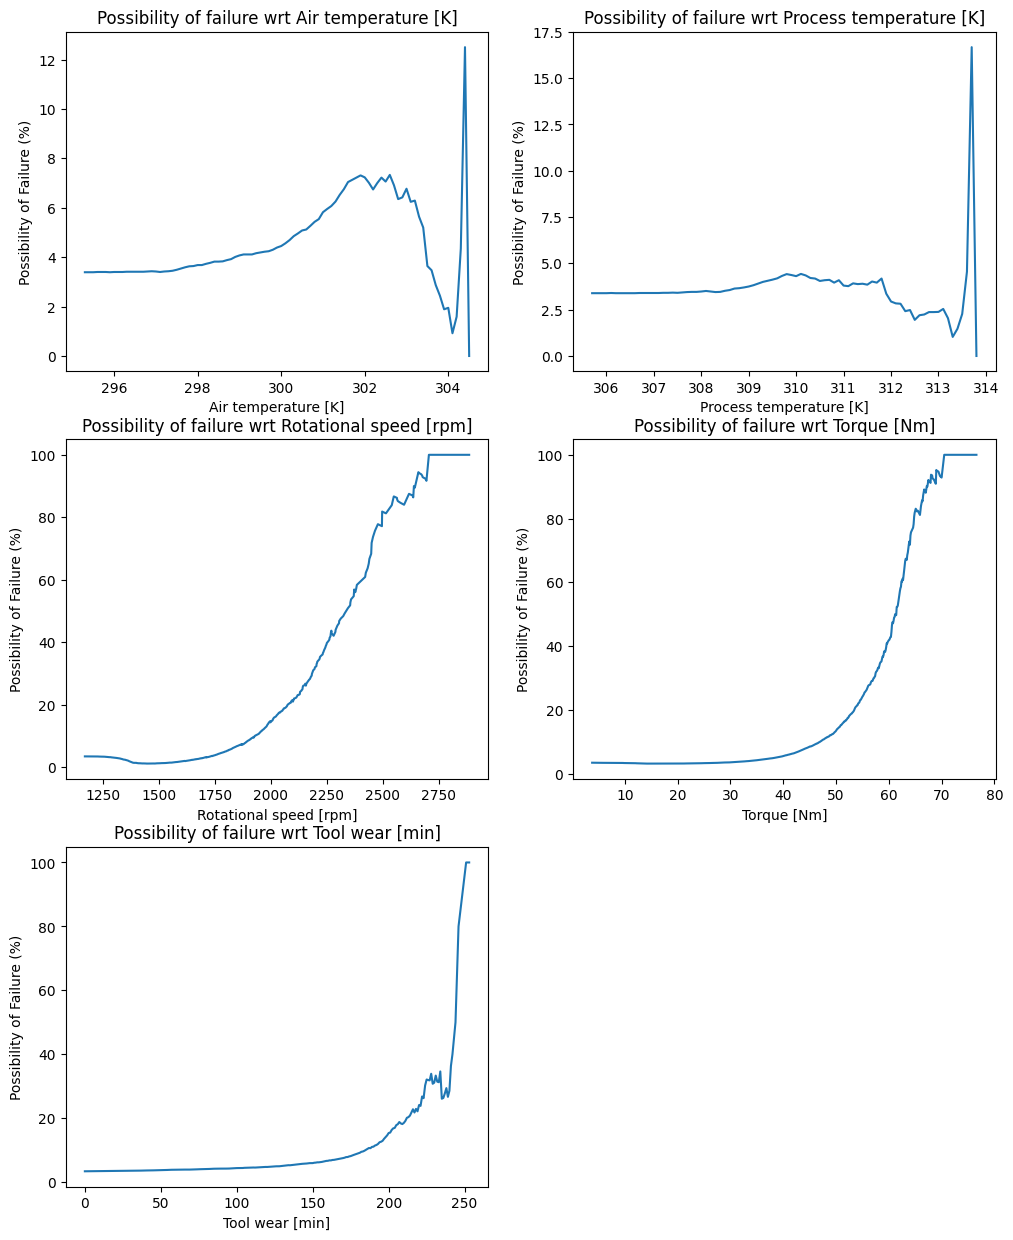

In [ ]:
plt.figure(figsize=(12,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m).set_title(label=("Possibility of failure wrt "+i))
    x,y = feat_prob(i,data)
    plt.xlabel(i)
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x)
    m+=1

In [ ]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

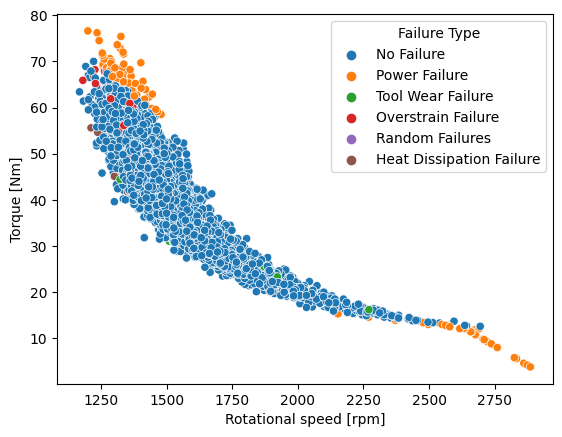

In [ ]:
sns.scatterplot(data=data,x='Rotational speed [rpm]',y='Torque [Nm]',hue='Failure Type')

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

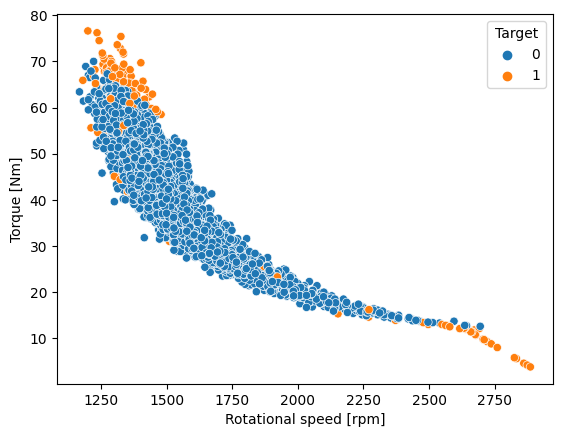

In [ ]:
sns.scatterplot(data=data,x='Rotational speed [rpm]',y='Torque [Nm]',hue='Target')

In [ ]:
print('xyz \n m')

xyz 
 m


In [ ]:
# Power (P) = Speed (n) x Torque (M).

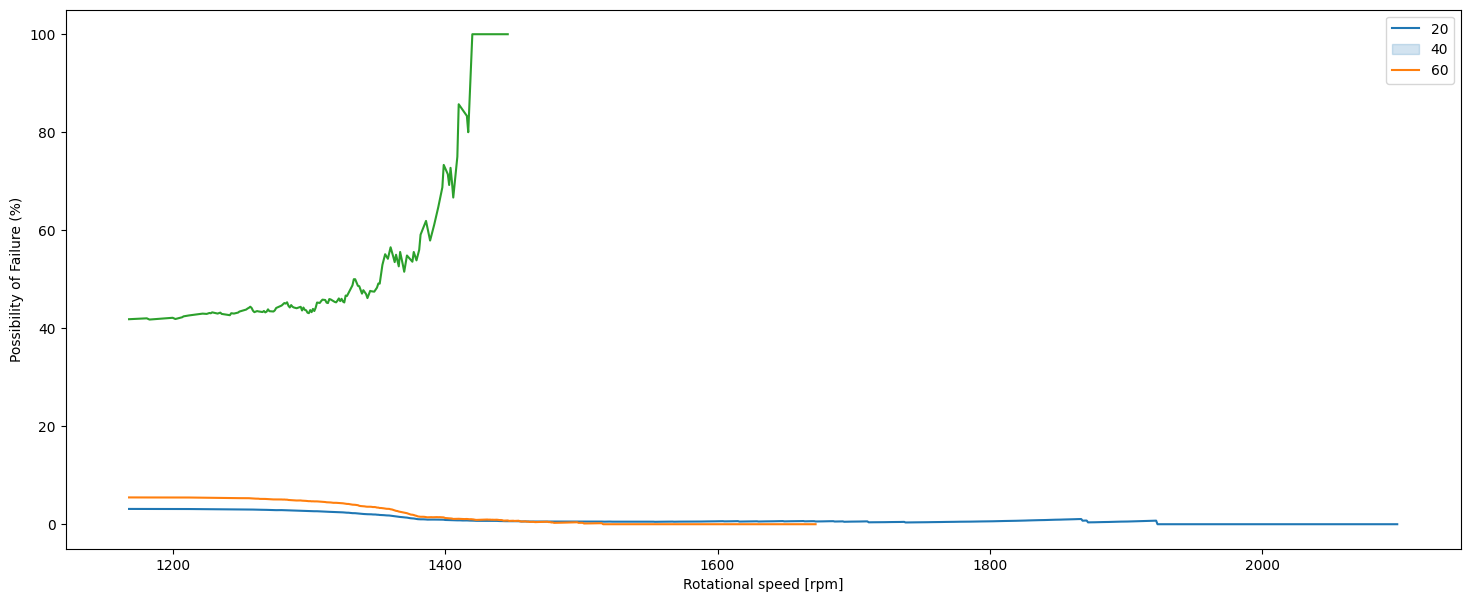

In [ ]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [20,40,60]:
    datasets.append(data[data['Torque [Nm]']>=i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')

    m+=1

plt.legend([20,40,60])

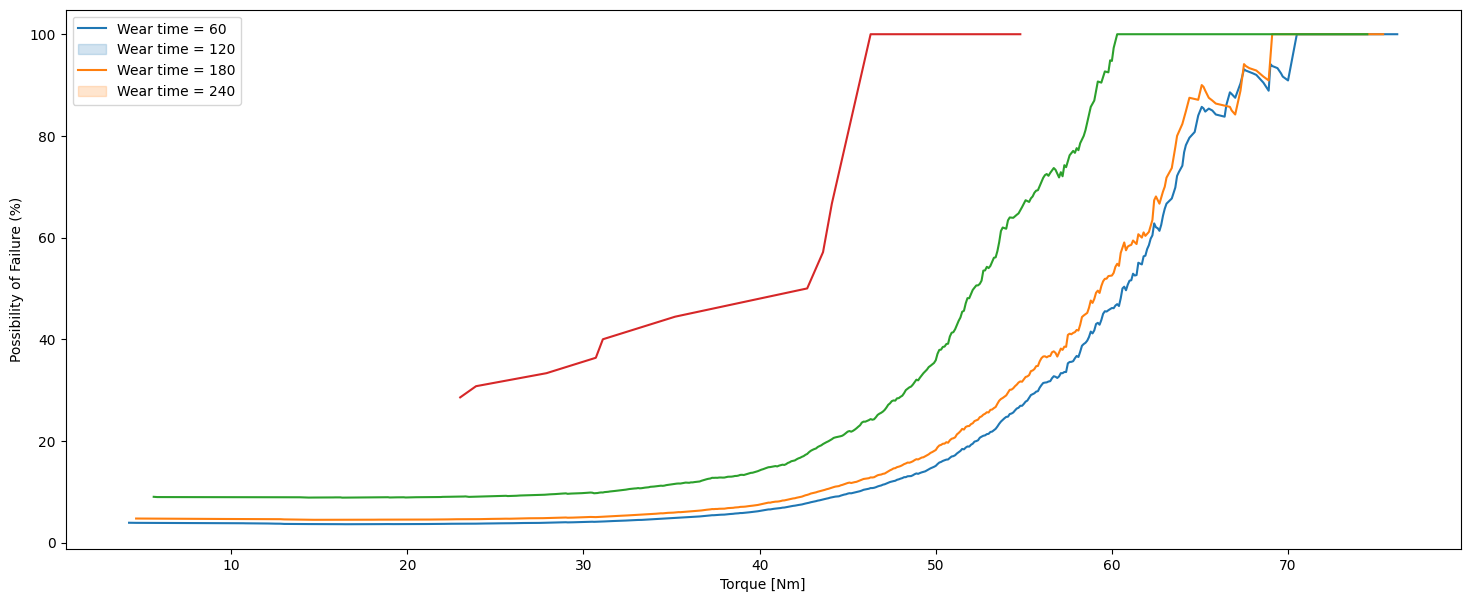

In [ ]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in [60,120,180,240]:
    datasets.append(data[data['Tool wear [min]']>=i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')

    m+=1

plt.legend(["Wear time = " + "60",
            "Wear time = "+'120',
            "Wear time = "+'180',
            "Wear time = "+'240'])




# Failure chance by Tool Type vs Torque<a href="#Failure-chance-by-Tool-Type-vs-Torque"

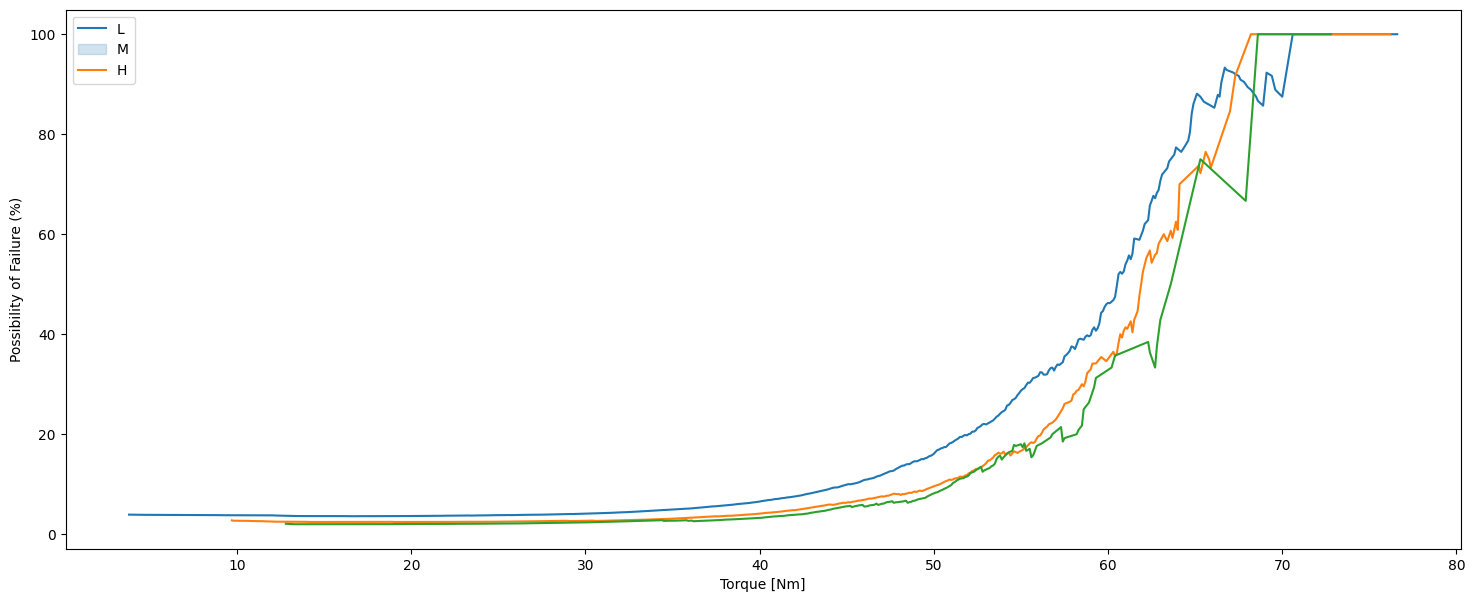

In [ ]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Torque [Nm]",i)
    plt.xlabel("Torque [Nm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')

    m+=1

plt.legend(["L","M","H"])

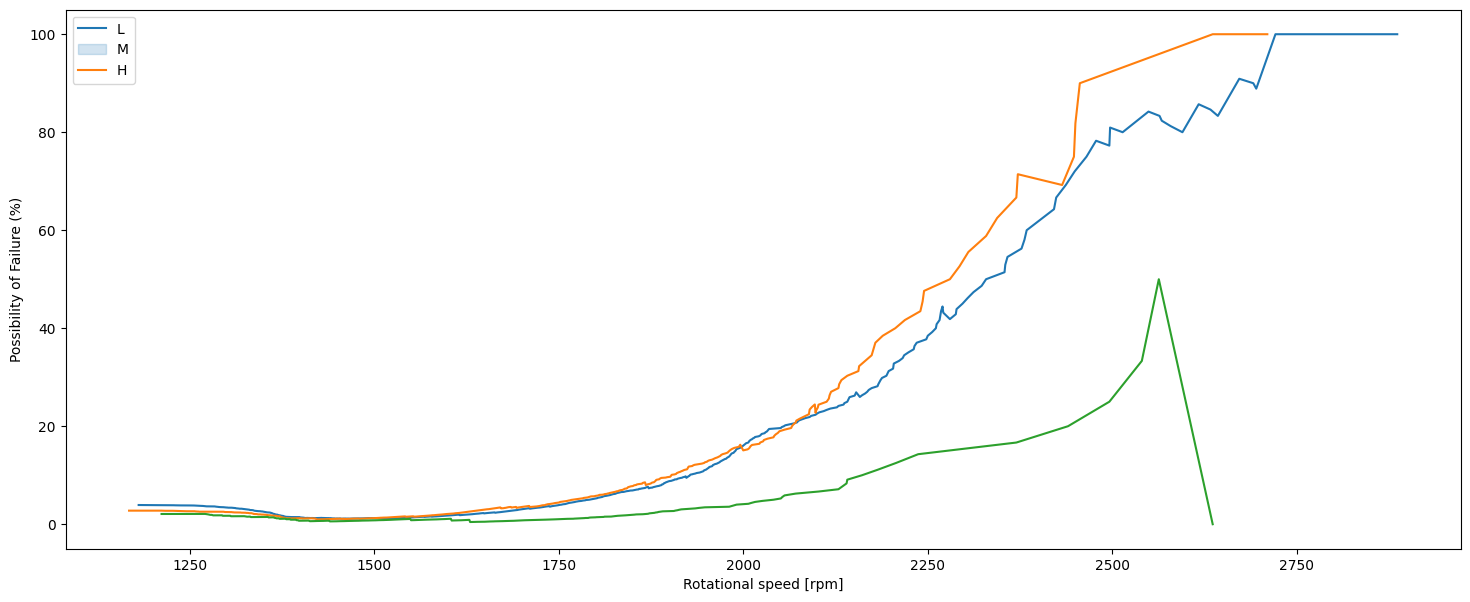

In [ ]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Rotational speed [rpm]",i)
    plt.xlabel("Rotational speed [rpm]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')

    m+=1

plt.legend(["L","M","H"])


# Tool Type vs wear Time

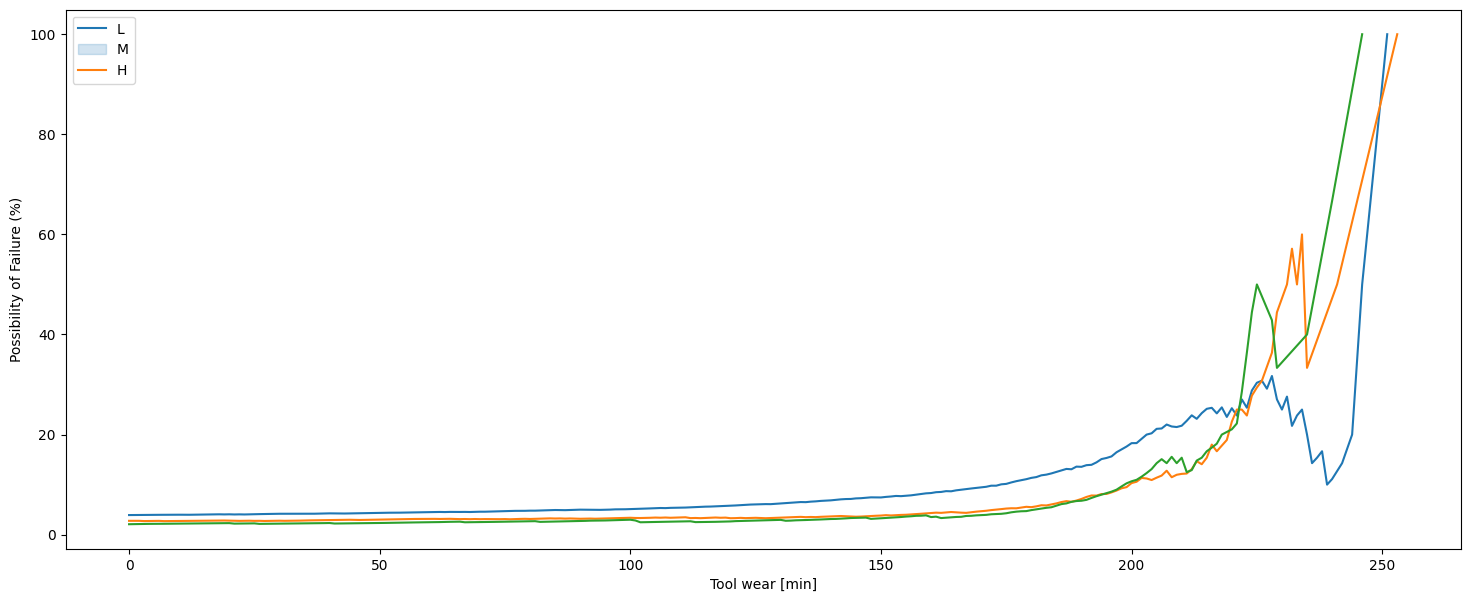

In [ ]:
plt.figure(figsize=(18,7))
m=1

datasets = []
for i in ["L","M","H"]:
    datasets.append(data[data['Type']==i])

for i in datasets :
    x,y = feat_prob("Tool wear [min]",i)
    plt.xlabel("Tool wear [min]")
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x,legend='brief')

    m+=1

plt.legend(["L","M","H"])

In [ ]:
data['nf'] = data['Tool wear [min]'] * data['Torque [Nm]']

<Axes: xlabel='nf', ylabel='Rotational speed [rpm]'>

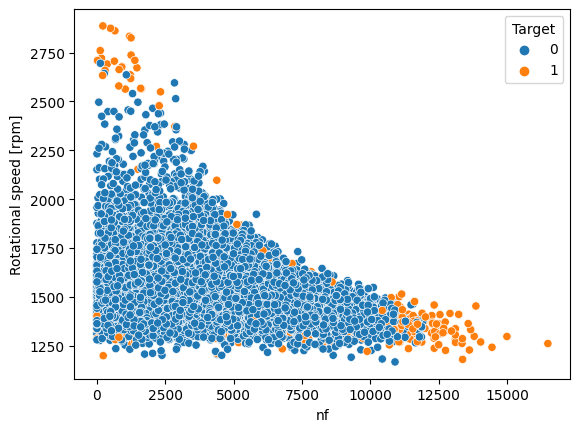

In [ ]:
sns.scatterplot(data=data,x='nf',y='Rotational speed [rpm]',hue='Target')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Target'])
data['Target'] = label_encoder.transform(data['Target'])

In [ ]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,413.0
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,540.6
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,734.8
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1212.5
9999,2,299.0,308.7,1500,40.2,30,0,No Failure,1206.0


Now, we will try to observe correlation of certain features with Failure Type using pandas Pivot Table. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. In short, PivotTable is an interactive way to quickly summarize large amounts of data.

# Test Tain Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Failure Type','Target'],axis=1),
                                                    data['Failure Type'], test_size=0.3, random_state=42)

# Prediction

In [ ]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]


#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')



All Models Imported
Models stored in dataframe called classifiers


In [ ]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models

    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})

    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)

    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])

    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])

    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))

    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))

    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [ ]:
display(classifiers)

,Classifier,Imported as
0,Multi Layer Perceptron,mlp
1,Bagging,bc
2,Gradient Boosting,gbc
3,Ada Boost,ada
4,Logistic Regression,lr
5,Random Forest,rfc
6,k Nearest Neighbours,knn
7,Support Vector Machine,svc
8,SVM tuning grid,grid
9,Stacked (RFR & SVM),stc


In [ ]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7000 non-null   int64  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
 6   nf                       7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [ ]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
classification.results()

,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,98.533,1.086065
1,GradientBoostingClassifier,98.533,9.106398
2,BaggingClassifier,98.467,0.312382
3,StackingClassifier,98.467,2.830956
4,LogisticRegression,97.100,0.354803
5,AdaBoostClassifier,96.800,0.727763
6,MLPClassifier,96.433,1.217415
7,KNeighborsClassifier,95.500,0.143523


In [ ]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: RandomForestClassifier
Accuracy of model: 98.533
Training Runtime in seconds 1.086
Classification Matrix:

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.90      0.78      0.84        23
              No Failure       0.99      1.00      0.99      2903
      Overstrain Failure       0.72      0.95      0.82        22
           Power Failure       0.84      0.68      0.75        31
         Random Failures       0.00      0.00      0.00         7
       Tool Wear Failure       0.00      0.00      0.00        14

                accuracy                           0.99      3000
               macro avg       0.58      0.57      0.57      3000
            weighted avg       0.98      0.99      0.98      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Conclusions
We noticed the presence of some data points which at first we referred as outliers but later turned out to be part of the natural variance of the data and played an important role in the classification task. Then we ran PCA and found that most of the variance is explained by the first three components, that can be represented as the following features: combination of the two Temperatures, Machine Power (product of Rotational Speed and Torque) and Tool Wear. In according to this, we found that these are the features that contribute the most in the predictions when apply the models. Contrary to logical predictions, we demonstrated that the machine’s type does not affect the presence of failure.

Deployment

In [ ]:
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
0,2,298.1,308.6,1551,42.8,0,0,No Failure,0.0
1,1,298.2,308.7,1408,46.3,3,0,No Failure,138.9
2,1,298.1,308.5,1498,49.4,5,0,No Failure,247.0


In [ ]:
input_data = (1,298.2,308.6,1551,49.4,3,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = stc.predict(input_data_reshaped)
print(prediction)

['No Failure']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



**Saving the trained model**

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(stc, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (1,298.2,308.6,1551,49.4,3,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

['No Failure']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

